Ingrese El pais para mostrar
argentina
['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']
[45510318, 45036032, 43257065, 41100123, 37070774, 32637657, 28024803, 23842803]
{'2022': 45510318, '2020': 45036032, '2015': 43257065, '2010': 41100123, '2000': 37070774, '1990': 32637657, '1980': 28024803, '1970': 23842803}


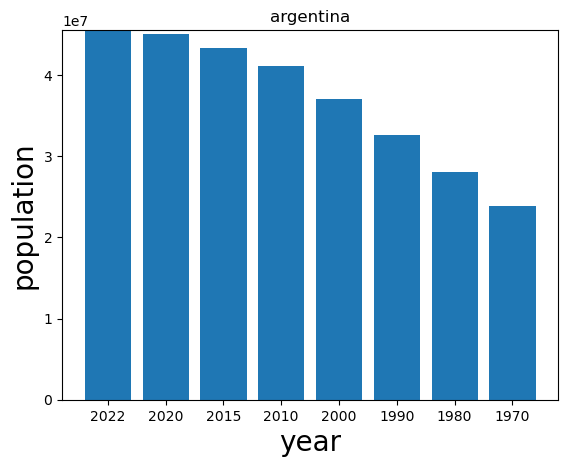

In [2]:
import csv
import re
import matplotlib.pyplot as plt

def read_csv(path):
    with open(path,'r') as csvFile:
        reader = csv.reader(csvFile, delimiter=',')
        header = next(reader)#como sabemos que la primera parte es el encabezado, usamos next para leer solo los titulos
        data = []
        for row in reader:
            iterable = zip(header, row) # me ayuda a que se me unan el header con el row
            country_dict = {key:value for key, value in iterable} # convertimos el iterable en un dic
            data.append(country_dict)
        return data    
            
if __name__ == '__main__':
    
    #se puede cambiar con la dirección del archivo
    data = read_csv('world_population.csv')
    
    #control digitacion erronea
    while True:
        pais = input("Ingrese El pais para mostrar\n")
        
        try:
            
            #filtramos para que solo sea el pais argentina
            country=list(filter(lambda data : data['Country/Territory'] ==pais.lower().title(),data))

            #encuentro keys del dic generado anteriormente, condicinando que se encuentre solo que tenga Population
            age = [re.findall('[0-9]+',i)[0] for i in list(country[0].keys()) if i in re.findall('[0-9]+ Population',i)]
            print(age)     
                
            #encuentro todos la cantidad de poblacion para cada año
            population = [int(list(map( lambda item : item[f'{age} Population'], country ))[0]) for age in age]
            print(population)
            
            
            zipper = zip(age,population)
            dic = {key : value for key, value in zipper}
            print(dic)
            
            #parte para graficar
            fig, ax = plt.subplots()
            ax.bar(age,population)
            ax.set_title(pais)
            ax.set_ylabel("population",fontsize=20)
            ax.set_xlabel("year",fontsize=20)
            ax.set_ylim(0,max(population))
            plt.show()
            
            
            
            
            break
            
        except IndexError as error:
            print("No se encontro el pais")
            continue